Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

Подберите параметры модели SARIMAX для этого ряда.

Сделайте вывод о том, как изменилась модель по сравнению с недельной.

Постройте ACF, PACF и модель ARIMA для BRENT (lнедельный )

Оцените результат моделирования

Сделайте предположение о моделях, которые лучше работают с техниками регрессии на основе ARIMA.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns

import statsmodels.api as sm
import itertools

In [2]:
data = pd.read_csv('my_PJME_MW.csv', index_col=[0], parse_dates=[0])
data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [3]:
data.describe()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
count,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000
mean,32079.773047,2009.801340,6.435979,15.722681,2.481241,180.459835,26.218643,2.999168,11.501101,0.027233,0.027075,0.027240
std,6464.167501,4.791885,3.438982,8.801258,1.114448,105.138073,15.019836,1.999572,6.921927,0.162763,0.162303,0.162783
min,14544.000000,2002.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27573.000000,2006.000000,3.000000,8.000000,1.000000,90.000000,13.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,31421.000000,2010.000000,6.000000,16.000000,2.000000,179.000000,26.000000,3.000000,12.000000,0.000000,0.000000,0.000000
75%,35648.750000,2014.000000,9.000000,23.000000,3.000000,271.000000,39.000000,5.000000,18.000000,0.000000,0.000000,0.000000
max,62009.000000,2018.000000,12.000000,31.000000,4.000000,366.000000,53.000000,6.000000,23.000000,1.000000,1.000000,1.000000


In [4]:
data_m = data.resample('M').mean()
data_m.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-31,31075.399731,2002.0,1.0,16.020188,1.0,16.020188,2.873486,2.905787,11.515478,0.063257,0.032301,0.064603
2002-02-28,30239.166667,2002.0,2.0,14.500000,1.0,45.500000,7.071429,3.000000,11.500000,0.035714,0.035714,0.035714
2002-03-31,28875.256720,2002.0,3.0,16.000000,1.0,75.000000,11.258065,3.193548,11.500000,0.000000,0.000000,0.000000
2002-04-30,28534.731572,2002.0,4.0,15.511822,2.0,105.511822,15.668985,2.828929,11.511822,0.000000,0.000000,0.000000
2002-05-31,28073.653226,2002.0,5.0,16.000000,2.0,136.000000,20.000000,3.000000,11.500000,0.032258,0.032258,0.032258


C:\Users\Anatoly\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


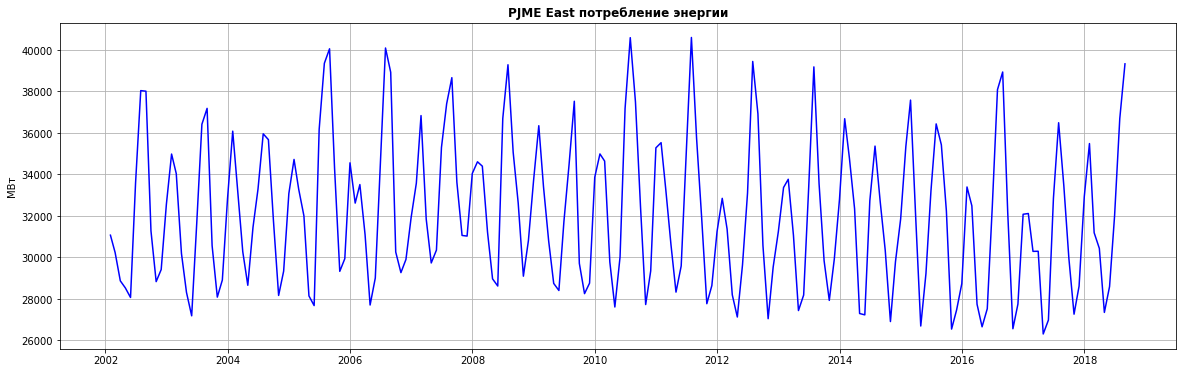

In [5]:
plt.figure(figsize =(20,6))
plt.plot( data_m.index, data_m['PJME_MW'], 'b' )
plt.title('PJME East потребление энергии', fontweight = 'bold')
plt.ylabel ( 'МВт' )
plt.grid()
plt.show()


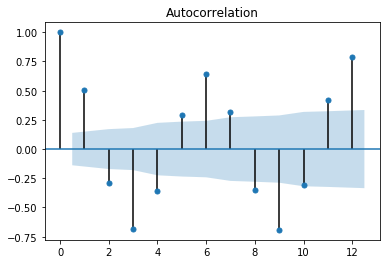

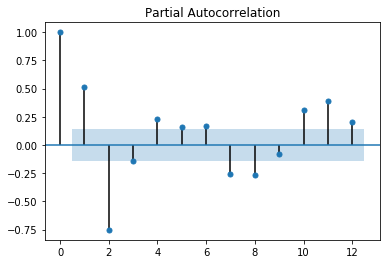

In [6]:
sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values, lags=12)
plt.show()
sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values, lags=12)
plt.show()

In [7]:
# Определим p, d и q 
p = 1   # определяем по графику автокорреляции 
d = 1   # практически всегда 1
q = 1   # определяем по графику частичной автокорреляции 

pdq = [p, d, q]
# определим комбинации сезонных параметров p, q и q, 
# будем работать с месячными данными, тогда сезонность это 12 недель
ps = 0
ds = 0
qs = 1

seasonal_pdq = [ps, ds, qs ,24]

In [8]:
import warnings

#для построения модели используем все данные, кроме 12-х последних месяцев (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-12],order = pdq,
                                seasonal_order = seasonal_pdq ,
                                enforce_stationarity = False ,
                                enforce_invertibility = False)
results = mod.fit()
print('SARIMAX{}x{} - AIC:{}'.format(pdq, seasonal_pdq, results.aic))

SARIMAX[1, 1, 1]x[0, 0, 1, 24] - AIC:2998.835473330053


In [9]:
print(results.summary().tables[0],results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  188
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 24)   Log Likelihood               -1495.418
Date:                            Mon, 09 Nov 2020   AIC                           2998.835
Time:                                    12:10:40   BIC                           3011.161
Sample:                                         0   HQIC                          3003.840
                                            - 188                                         
Covariance Type:                              opg                                         
========================================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

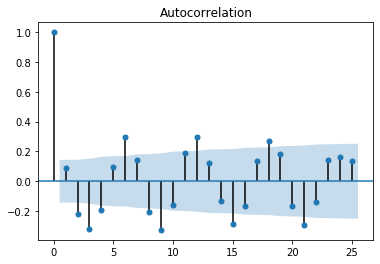

In [10]:
sm.graphics.tsa.plot_acf(results.resid, lags=25)
plt.show()

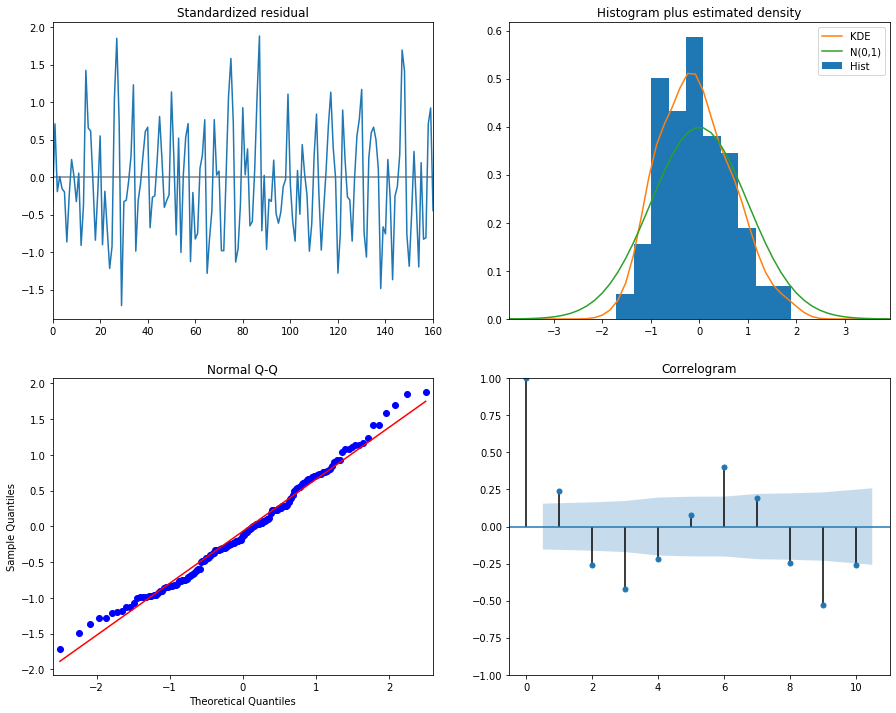

In [11]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [12]:
# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q

p = [0] 
d = [0,1]
q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]



In [13]:
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-12],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 24)3 - AIC:4416.269672223332
ARIMA(0, 0, 0)x(0, 0, 1, 24)3 - AIC:3739.6561215158104
ARIMA(0, 0, 0)x(0, 0, 2, 24)3 - AIC:5296.188876413321
ARIMA(0, 0, 0)x(0, 1, 0, 24)3 - AIC:2971.5668206658843
ARIMA(0, 0, 0)x(0, 1, 1, 24)3 - AIC:2522.8166852431677
ARIMA(0, 0, 0)x(0, 1, 2, 24)3 - AIC:4988.9242934028225
ARIMA(0, 0, 1)x(0, 0, 0, 24)3 - AIC:4259.479361221401
ARIMA(0, 0, 1)x(0, 0, 1, 24)3 - AIC:3683.13245930611
ARIMA(0, 0, 1)x(0, 0, 2, 24)3 - AIC:11905.563907585783
ARIMA(0, 0, 1)x(0, 1, 0, 24)3 - AIC:2924.153713894319
ARIMA(0, 0, 1)x(0, 1, 1, 24)3 - AIC:2479.5630695123155
ARIMA(0, 0, 1)x(0, 1, 2, 24)3 - AIC:5740.84020695879
ARIMA(0, 0, 2)x(0, 0, 0, 24)3 - AIC:4206.520029699726
ARIMA(0, 0, 2)x(0, 0, 1, 24)3 - AIC:3655.046640722355
ARIMA(0, 0, 2)x(0, 0, 2, 24)3 - AIC:4960.060530532675
ARIMA(0, 0, 2)x(0, 1, 0, 24)3 - AIC:2908.485813491812
ARIMA(0, 0, 2)x(0, 1, 1, 24)3 - AIC:2462.368425401227
ARIMA(0, 0, 2)x(0, 1, 2, 24)3 - AIC:4967.142288658243
ARIMA(0, 1, 0)x(0, 0, 0,

ARIMA(2, 2, 1)x(0, 0, 2, 24)3 - AIC:nan
ARIMA(2, 2, 1)x(0, 1, 0, 24)3 - AIC:2960.2264161296284
ARIMA(2, 2, 1)x(0, 1, 1, 24)3 - AIC:2452.453687396719
ARIMA(2, 2, 1)x(0, 1, 2, 24)3 - AIC:3605.1926498954153
ARIMA(2, 2, 2)x(0, 0, 0, 24)3 - AIC:3339.4547332501143
ARIMA(2, 2, 2)x(0, 0, 1, 24)3 - AIC:2904.565842688865
ARIMA(2, 2, 2)x(0, 0, 2, 24)3 - AIC:nan
ARIMA(2, 2, 2)x(0, 1, 0, 24)3 - AIC:2928.9939115929083
ARIMA(2, 2, 2)x(0, 1, 1, 24)3 - AIC:2430.2882353274326
ARIMA(2, 2, 2)x(0, 1, 2, 24)3 - AIC:4431.410375157196


In [14]:
#для построения модели используем все данные, кроме 3-х последних месяцев (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[0:-12],order=[0,1,2],
                                seasonal_order=[0,1,1,24] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print(f'AIC:\n{ results_opt.aic}')

AIC:
2408.0031553695844


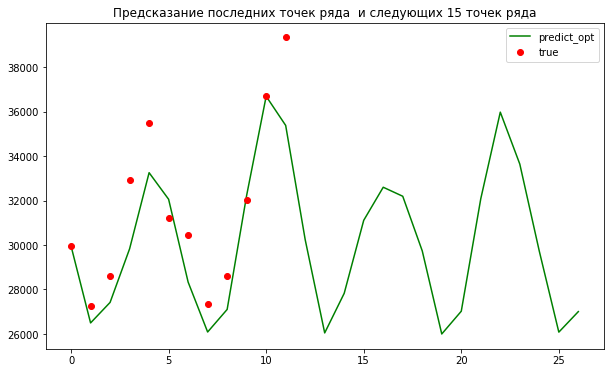

In [15]:

pred_dynamic = results.forecast(27)    #делаем предсказание на 3 точки от текущего конца ряда
pred_dynamic_opt = results_opt.forecast(27)

plt.figure(figsize =(10,6))
#plt.plot(pred_dynamic, label='predict' )  #вообще где то в космосе
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(data_m['PJME_MW'].values[-12:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 15 точек ряда')
plt.legend()

plt.show()

Показатель AIC лучше, чем на недельной модели. Это получилось за счет меньшей волатильности за счет усреднения цифр. Но пока есть к чему стремиться.

In [ ]:
brent = pd.read_csv('my_BRENT2019.csv', index_col=[1], parse_dates=[1])